In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
##Setting display option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
sns.set_theme(style="whitegrid", palette="pastel")

In [6]:
df=pd.read_parquet("https://storage.googleapis.com/safechat-gcs/safechat_data.parquet")
df.head()

,text,created_at,removed
0,I've always been taught it emerged from the earth after an impace. That is why it has similar elemental distribution to earth,1520121101,0
1,"As an ECE, my first feeling as ""HEY THAT'S NOT-"" and then I thought about all the times my co-workers couldn't even write a simple message in our communication book without making mistakes. \r\n\r\nI'm getting out of the profession.",1506533157,1
2,Monday: Drug companies stock dives on good news for patients.,1528087570,1
3,i learned that all hybrids are unfertile i wont read clickbaits https://biology.stackexchange.com/questions/16922/why-are-hybrids-infertile,1504290041,0
4,Well i was wanting to get wasted tonight. Not so much after reading this article...,1535140675,0


In [7]:
df.shape

(223372, 3)

### Checking the created_at column

In [12]:
##Function to convert timestamp to datetime
def get_time(timestamp):
    time = pd.to_datetime(timestamp, unit='s')  
    return(time)

In [13]:
##Getting the date range for comments
max_date=df['created_at'].max()
print("Max of created date:",max_date, " Date:", get_time(max_date))
min_date=df['created_at'].min()
print("Min of created date",min_date," Date:", get_time(min_date))

Max of created date: 1538351743  Date: 2018-09-30 23:55:43
Min of created date 1483228834  Date: 2017-01-01 00:00:34


### Checking the removed column

In [41]:
##Checking the removed column
## 1 is removed 0 is not removed
df['removed'].unique()

array([0, 1])

Text(0.5, 1.0, 'Removed vs Not Removed')

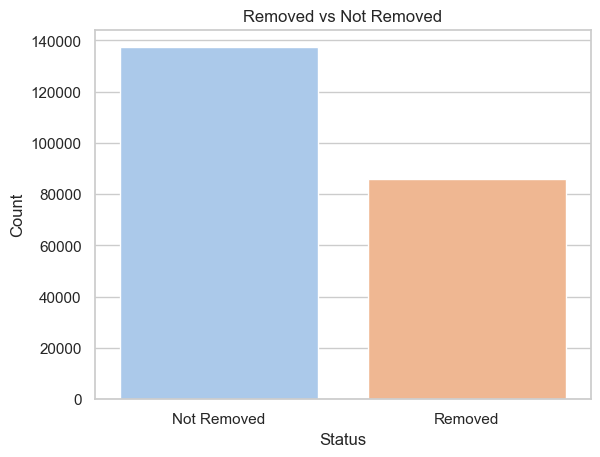

In [65]:
##Value for removed and not removed
sns.barplot(x=['Not Removed','Removed'],y=df['removed'].value_counts().values.tolist())
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Removed vs Not Removed')

In [81]:
##Ratio to removed to not removed
count_of_removed=df['removed'].value_counts()[1]
count_of_not_removed=df['removed'].value_counts()[0]
ratio_rem_to_nrem=(count_of_removed/count_of_not_removed)*100
print("Ratio of removed to not removed count: ",format(ratio_rem_to_nrem,".3f"),"%")

Ratio of removed to not removed count:  62.623 %
